## SIFT(Scale Invariant Feature Transform)

- 이미지의 scale, rotation(회전) 및 translation(이동)에 robust(불변)한 특징점을 추출하는 알고리즘

**1. step1: Scale-space extrema(극점) detection**
    1. scale-space 만들기

        scale-space : 원본 이미지를 다양한 크기로 resize해서 image pyramid를 만들었을 때, 각 층의 이미지(octave image)를 점점 커지는 σ(가우시안 blur scale factor)로 blurring을 해 얻은 이미지들
   <img src="img/scale-space.PNG" alt='scale-space' width="50%" height="50%">


    2. Difference of Gaussian(DoG)이미지 연산

        같은 octave 내 서로 다른 두개의 gaussian blur image로 빼기 연산 수행
<img src="img/Dog.PNG" alt='Dog' width="50%" height="50%">

    3. extrema detection
        target pixel에서 총 26개의 주변 pixel값과 비교했을 때, 극소점이나 극대점이라 판단되면 keypoint 후보군으로 분류
<img src="img/target.PNG" alt='target' width="50%" height="50%">


**2. step2: Keypoint localization**

    후보 keypoint 중 활용가치가 떨어지는 것들은 제거, 코너에 위치한 keypoint만 남기기 → scale에 불변한 keypoint들을 얻을 수 있음

**3. step3: Orientation assignment**

    keypoint들에 방향을 할당해주어 rotation에 불변하게 해줌

    1. 각 keypoint의 주변에 윈도우를 만들어주고 가우시안 블러링을 해줌
    2. 윈도우 안의 모든 픽셀들의 그레디언트 방향과 크기를 구함
    3. 가로축이 방향, 세로축이 크기인 히스토그램을 그렸을 때, 가장 큰 값을 가지는 방향을 keypoint의 방향으로 설정
    4. 만약 가장 큰 keypoint 방향의 80%보다 큰 각도가 존재하면 그 각도도 keypoint의 방향으로 설정 (한 keypoint에 여러 방향을 가질 수 있음)

<img src="img/histo.PNG" alt='histo' width="60%" height="60%">

**4. step4: Keypoint descriptor**

    keypoint을 식별하기 위한 descriptor 생성

    1. keypoint를 중심으로 16개 윈도우 세팅, 한 윈도우는 4x4 크기의 작은 윈도우로 구성
    2. 16개 윈도우로 8개 bin을 가진 히스토그램을 생성
    3. 16x8=128개의 벡터가 descriptor가 됨

<img src="img/window.PNG" alt='window' width="60%" height="60%">

## Application

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

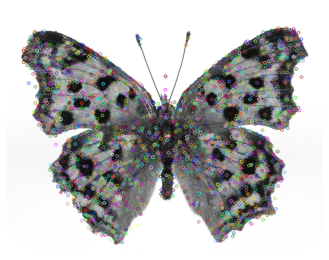

In [12]:
img = cv2.imread('img/butterfly.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# sift검출기 생성
sift = cv2.xfeatures2d.SIFT_create()

# keypoint검출
keypoints = sift.detect(image=gray, mask=None)

res = cv2.drawKeypoints(image=gray, keypoints=keypoints, outImage=None)
res_with_rich = cv2.drawKeypoints(image = gray,
                                  keypoints = keypoints,
                                  outImage = None,
                                  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(res)
plt.tight_layout()
plt.axis('off')
plt.show()

## feature matching


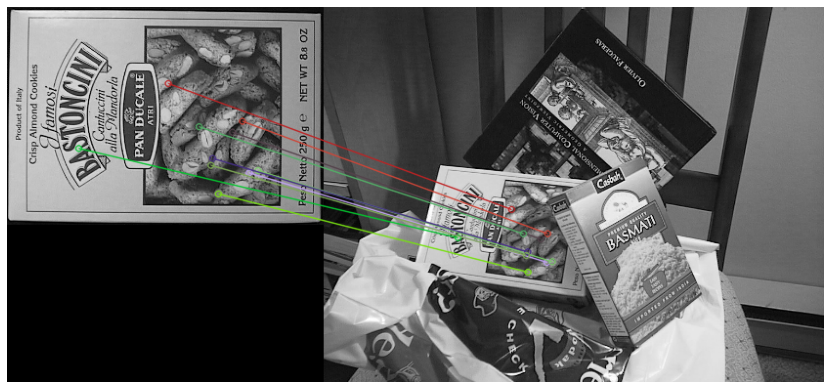

In [13]:
img = cv2.imread('img/box.png')
img_train = cv2.imread('img/box_in_scene.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_train = cv2.cvtColor(img_train, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()

# keypoint검출 및 descriptor 생성
kp_query, des_query = sift.detectAndCompute(image=gray, mask=None)
kp_train, des_train = sift.detectAndCompute(gray_train, None)

## BFMatcher 객체 생성
bf = cv2.BFMatcher(normType = cv2.NORM_L2, crossCheck = False)

## descriptor 간 매칭 수행
matches = bf.match(queryDescriptors = des_query, trainDescriptors = des_train)

## distance를 기준으로 오름차순 정렬
matches = sorted(matches, key = lambda x:x.distance)

## 첫 10개의 매칭만 그리기
res = cv2.drawMatches(img1 = img,
                      keypoints1 = kp_query,
                      img2 = img_train,
                      keypoints2 = kp_train,
                      matches1to2 = matches[:10],
                      outImg = None,
                      flags = 2)

plt.figure(figsize=(12, 12))
plt.imshow(res)
plt.tight_layout()
plt.axis('off')
plt.show()